# Домашнее задание к лекции "Статистика. Практика"


## Задание 1
Вернемся к набору данных о видеоиграх.

Ответьте на следующие вопросы: 

 1) Как критики относятся к спортивным играм?  
 2) Критикам нравятся больше игры на PC или на PS4?  
 3) Критикам больше нравятся стрелялки или стратегии?  

Для каждого вопроса:

- сформулируйте нулевую и альтернативную гипотезы;  
- выберите пороговый уровень статистической значимости;  
- опишите полученные результаты статистического теста.



In [209]:
import pandas as pd
import numpy as np

In [210]:
df = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/vgsales.csv')
df['User_Score'].replace('tbd', np.NaN, inplace=True)
df['Critic_Score'] = df.Critic_Score.astype('Float64')
df['Critic_Count'] = df.Critic_Count.astype('Int64')

In [214]:
critic_games = df[['Genre', 'Platform', 'Critic_Score', 'Critic_Count']]
critic_games = critic_games.loc[critic_games['Critic_Score'] > 0]
critic_games

,Genre,Platform,Critic_Score,Critic_Count
0,Sports,Wii,76.0,51
2,Racing,Wii,82.0,73
3,Sports,Wii,80.0,73
6,Platform,DS,89.0,65
7,Misc,Wii,58.0,41
...,...,...,...,...
16700,Shooter,PC,61.0,12
16701,Puzzle,GC,53.0,4
16702,Puzzle,DS,48.0,10
16706,Strategy,PC,60.0,12


In [215]:
critic_games.describe()

,Critic_Score,Critic_Count
count,8137.000000,8137.000000
mean,68.967679,26.360821
std,13.938165,18.980495
min,13.000000,3.000000
25%,60.000000,12.000000
50%,71.000000,21.000000
75%,79.000000,36.000000
max,98.000000,113.000000


### 1. Как критики относятся к спортивным играм?

In [216]:
critic_score_sport = critic_games.groupby('Genre').Critic_Score.mean().reset_index()
critic_score_sport.sort_values('Critic_Score', ascending=False)

,Genre,Critic_Score
7,Role-Playing,72.652646
11,Strategy,72.086093
10,Sports,71.968174
8,Shooter,70.181144
2,Fighting,69.217604
9,Simulation,68.619318
4,Platform,68.058350
6,Racing,67.963612
5,Puzzle,67.424107
0,Action,66.629101


In [217]:
critic_count_sport = critic_games.groupby('Genre').Critic_Count.sum().reset_index()
critic_count_sport.sort_values('Critic_Count', ascending=False)

,Genre,Critic_Count
0,Action,52506
8,Shooter,33616
10,Sports,25110
7,Role-Playing,23945
6,Racing,17087
4,Platform,11778
2,Fighting,11415
3,Misc,11262
11,Strategy,8538
9,Simulation,7549


##### Из полученных df видно, следующее:  
 - средняя оценка для спортивных игр, в рейтинге средних оценок по всем жанрам, стоит на третьем месте (из 12) и ее значение больше средней оценки по всем жанрам (71.97 > 68.97);  
 - активность выставления оценок критиками для спортивных игр, так же выше среднего.
 
##### Соответственно можно сделать вывод, что критикам нравятся спортивные игры.

#### Гипотезы.
###### # H0: Критикам нравятся спортивные игры, в среднем, не более, чем на 69%, т.е. Critic_Score.mean() <= 69
###### # H1: Критикам нравятся спортивные игры, в среднем, более, чем на 69%, т.е. Critic_Score.mean() > 69

In [218]:
sports_critic_score = critic_games.loc[critic_games.Genre.str.contains('Sports')]
sports_critic_score

,Genre,Platform,Critic_Score,Critic_Count
0,Sports,Wii,76.0,51
3,Sports,Wii,80.0,73
13,Sports,Wii,80.0,63
15,Sports,Wii,80.0,33
77,Sports,PS4,82.0,42
...,...,...,...,...
16456,Sports,XB,78.0,8
16478,Sports,X360,57.0,5
16532,Sports,PC,78.0,8
16550,Sports,GBA,78.0,13


In [219]:
from scipy import stats as st

In [220]:
alpha = 0.000000000001
result = st.ttest_1samp(sports_critic_score['Critic_Score'], 69) #, alternative='greater')

print(sports_critic_score['Critic_Score'].mean())
print(result)

if result.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу, среднее значение оценок критиков для спортивных игр больше 69 (спортивные игры критикам нравятся)')
else:
    print('Не отвергаем нулевую гипотезу, спортивные игры критикам не нравятся')

71.96817420435511
Ttest_1sampResult(statistic=7.390113898370428, pvalue=2.751179415692182e-13)
Отвергаем нулевую гипотезу, среднее значение оценок критиков для спортивных игр больше 69 (спортивные игры критикам нравятся)


In [221]:
print('Пороговый уровень статистической значимости равен :', alpha*100, '%')

Пороговый уровень статистической значимости равен : 1e-10 %


In [222]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 11,5

Text(0.5, 1.0, 'Распределение оценок критиков для спортивных игр')

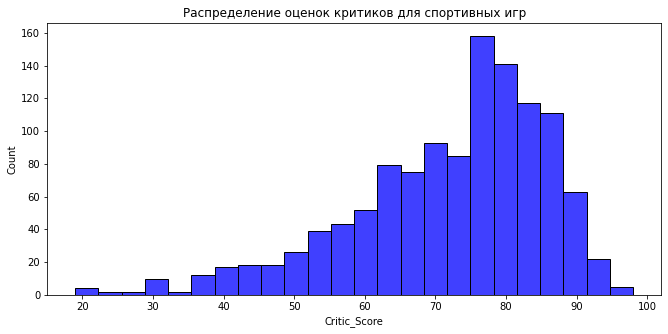

In [223]:
sns.histplot(sports_critic_score, x='Critic_Score', color='blue')
plt.title('Распределение оценок критиков для спортивных игр')

###### Среднее значение оценок критиков для спортивных игр 71.97, что выше среднего значения оценок по всем жанрам.
###### Значение p-value чень низкое, что без всяких сомнений дает нам право отвергнуть нулевую гипотезу.
###### Значение t-статистики положительно, и подтверждает то, что cреднее значение оценок критиков для спортивных игр больше среднего значения оценок по всем жанрам.

### 2. Критикам нравятся больше игры на PC или на PS4?

In [224]:
critic_score_platforms = critic_games.groupby('Platform').Critic_Score.mean().reset_index()
critic_score_two_platforms = critic_score_platforms.sort_values('Critic_Score', ascending=False)\
                                                   .loc[critic_score_platforms.Platform.isin(['PC','PS4'])]
critic_score_two_platforms

,Platform,Critic_Score
5,PC,75.928671
9,PS4,72.091270


In [225]:
critic_score_platforms_mode = critic_games[['Platform', 'Critic_Score']]
critic_score_platforms_mode.loc[critic_score_platforms_mode.Platform.isin(['PC','PS4'])].mode()

,Platform,Critic_Score
0,PC,80.0


In [226]:
critic_count_platforms = critic_games.groupby('Platform').Critic_Count.sum().reset_index()
critic_count_platforms.sort_values('Critic_Count', ascending=False).loc[critic_count_platforms.Platform.isin(['PC','PS4'])]

,Platform,Critic_Count
5,PC,19963
9,PS4,9820


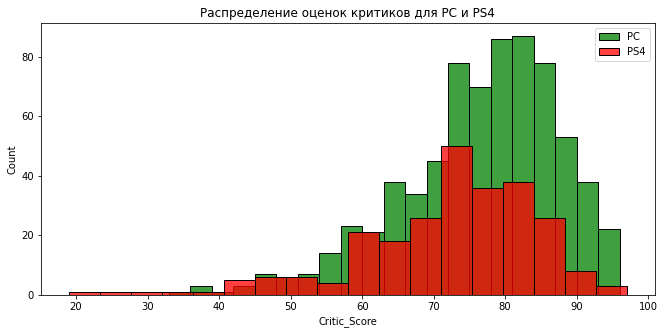

In [227]:
PC_df = critic_games.loc[critic_games.Platform.str.contains('PC')]
PS4_df = critic_games.loc[critic_games.Platform.str.contains('PS4')]
sns.histplot(PC_df, x='Critic_Score', color='green')
sns.histplot(PS4_df, x='Critic_Score', color='red')
plt.title('Распределение оценок критиков для PC и PS4')
plt.legend(critic_score_two_platforms.Platform.unique())

##### Из полученных df видно, следующее:  
 - средняя оценка для PC больше чем для PS4 (75.9 > 72.09);   
 - самая часто выстывляемая оценка "80.0" для PC;  
 - активность выставления оценок критиками для PC больше в два раза, чем для PS4.
 
##### Соответственно можно сделать вывод, что критикам больше нравятся игры на PC, чем на PS4. Распределение оценок на визуализации это подтверждает.

#### Гипотезы.
###### H0: Критикам нравятся игры на PS4 не менее, чем на PC, т.е. PS4.Critic_Score.mean() >= PC.Critic_Score.mean()
###### H1: Критикам нравятся игры на PS4 меньше, чем на PC, т.е. PS4.Critic_Score.mean() < PC.Critic_Score.mean()

In [228]:
alpha = 0.000021
result = st.ttest_ind(PC_df.Critic_Score, PS4_df.Critic_Score, equal_var = False)

print('Разница средних значений оценок критиков по платформам (PC-PS4): ',\
      round(PC_df.Critic_Score.mean() - PS4_df.Critic_Score.mean(), 2))
print(result)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, среднее значение оценок критиков для PS4 меньше среднего значения оценок для PC \
                    (критикам больше нравятся игры на PC, чем на PS4)')
else:
    print('Не отвергаем нулевую гипотезу, критикам нравятся игры на PS4 не меньше чем на PC')

Разница средних значений оценок критиков по платформам (PC-PS4):  3.84
Ttest_indResult(statistic=4.3087588262138725, pvalue=2.067249157283479e-05)
Отвергаем нулевую гипотезу, среднее значение оценок критиков для PS4 меньше среднего значения оценок для PC                     (критикам больше нравятся игры на PC, чем на PS4)


In [229]:
print('Пороговый уровень статистической значимости равен :', alpha*100, '%')

Пороговый уровень статистической значимости равен : 0.0021 %


###### Разница средних значений оценок критиков для игр на PC и PS4 равна 3.84, что говорит о том, что критикам больше нравятся игры на PC, чем на PS4.
###### Значение p-value низкое, при котором мы, без сомнений,  отвергаем нулевую гипотезу.
###### Значение t-статистики положительно, и подтверждает то, что критикам больше нравятся игры на PC, чем на PS4.

### 3. Критикам больше нравятся стрелялки или стратегии?

In [230]:
critic_score_genres = critic_games.groupby('Genre').Critic_Score.mean().reset_index()
critic_score_two_genres = critic_score_genres.sort_values('Critic_Score', ascending=False)\
                                             .loc[critic_score_genres.Genre.isin(['Shooter','Strategy'])]
critic_score_two_genres

,Genre,Critic_Score
11,Strategy,72.086093
8,Shooter,70.181144


In [231]:
critic_score_genres_mode = critic_games[['Genre', 'Critic_Score']]
critic_score_genres_mode.loc[critic_score_genres_mode.Genre.isin(['Shooter','Strategy'])].mode()

,Genre,Critic_Score
0,Shooter,78.0


In [232]:
critic_count_genres = critic_games.groupby('Genre').Critic_Count.sum().reset_index()
critic_count_genres.sort_values('Critic_Count', ascending=False).loc[critic_count_genres.Genre.isin(['Shooter','Strategy'])]

,Genre,Critic_Count
8,Shooter,33616
11,Strategy,8538


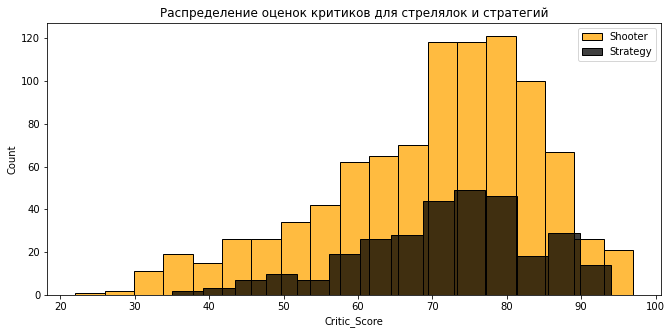

In [233]:
Shooter_df = critic_games.loc[critic_games.Genre.str.contains('Shooter')]
Strategy_df = critic_games.loc[critic_games.Genre.str.contains('Strategy')]
sns.histplot(Shooter_df, x='Critic_Score', color='orange')
sns.histplot(Strategy_df, x='Critic_Score', color='black')
plt.title('Распределение оценок критиков для стрелялок и стратегий')
critic_score_plt = critic_score_two_genres.sort_values('Critic_Score', ascending=True)
plt.legend(critic_score_plt.Genre)

##### Из полученных df видно, следующее:  
 - средняя оценка для Стрелялок меньше, чем для Стратегий (70.2 < 72.1);   
 - при этом самая часто выстывляемая оценка "78.0" принадлежит стрелялкам;  
 - и активность выставления оценок критиками за Стрелялки больше в 4 раза, чем за Стратегии;  
 - визуализация показывает, что для Стрелялок оценки критиками выставлялись активнее, чем для Стратегии.

##### Исходя из полученных рузультатов осмелюсь предположить, что критикам больше нравятся Стрелялки, чем Стратегии (хоть и среднее значение оценок для Стрелялок меньше, чем среднее значение для Стратегий). Обосную этот вывод разницей проявления интереса к этим жанрам. Т.е. выставление оценок для Стрелялок гораздо больше, чем для Стратегий.

#### Гипотезы.
###### H0: Критикам нравятся стратегии не менее, чем стрелялки, т.е. Strategy.Critic_Count.sum() >= Shooter.Critic_Count.sum()
###### H1: Критикам нравятся стрелялки больше, чем стратегии, т.е. Strategy.Critic_Count.sum() < Shooter.Critic_Count.sum()

In [258]:
alpha = 1.0000000000000001e-500
result = st.ttest_ind(Shooter_df.Critic_Count, Strategy_df.Critic_Count, equal_var = False)

print('Отношение количества критиков, выставляемых оценки по жанрам (Shooter / Strategy): ',\
      round(Shooter_df.Critic_Count.sum() / Strategy_df.Critic_Count.sum(), 2))
print(result)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, количество критиков, выставляемых оценки для Стратегий меньше количества критиков, \
выставляемых оценки для Стрелялок (критикам больше нравятся Стрелялки, чем Стратегии)')
else:
    print('Не отвергаем нулевую гипотезу, критикам нравятся Стратегии не меньше чем Стрелялки')

Отношение количества критиков, выставляемых оценки по жанрам (Shooter / Strategy):  3.94
Ttest_indResult(statistic=5.80206144169481, pvalue=1.0668209140151038e-08)
Не отвергаем нулевую гипотезу, критикам нравятся Стратегии не меньше чем Стрелялки


In [259]:
print('Пороговый уровень статистической значимости равен :', alpha*100, '%')

Пороговый уровень статистической значимости равен : 0.0 %


###### Отношение средних значений количеств критиков, выставляемых оценки по жанрам (Shooter / Strategy) равна 1.26, что говорит о том, что критики больше проявляют интерес к Стрелялкам, чем к Стратегиям.
###### Значение p-value низкое, при котором мы, без сомнений,  отвергаем нулевую гипотезу.
###### Значение t-статистики положительно, и подтверждает то, что критикам больше нравятся игры на PC, чем на PS4.

## Задание 2
Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные здесь) по признаку спама. Для этого:  

1) Привидите весь текст к нижнему регистру;  
2) Удалите мусорные символы;  
3) Удалите стоп-слова;  
4) Привидите все слова к нормальной форме;  
5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:  

    from sklearn.feature_extraction.text import TfidfVectorizer

    tfidf = TfidfVectorizer()
    tfidf_matrix = tfidf.fit_transform(df.Message)
    names = tfidf.get_feature_names()
    tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
    
Можете поэкспериментировать с параметрами TfidfVectorizer;  
6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите random_state=42. Используйте train_test_split;  
7) Постройте модель логистической регрессии, укажите random_state=42, оцените ее точность на тестовых данных;  
8) Опишите результаты при помощи confusion_matrix;  
9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [260]:
msgs = pd.read_html('https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/spam.csv')[0]
msgs = msgs[['Category', 'Message']]
msgs

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
from sklearn.model_selection import train_test_split